# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
# load the csv
df = pd.read_csv("airbnb_clean.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'name', 'description', 'host_id',
       'host_name', 'neighborhood_cleansed', 'neighborhood_group_cleansed',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'maximum_nights', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating', 'license',
       'calculated_host_listings_count'],
      dtype='object')

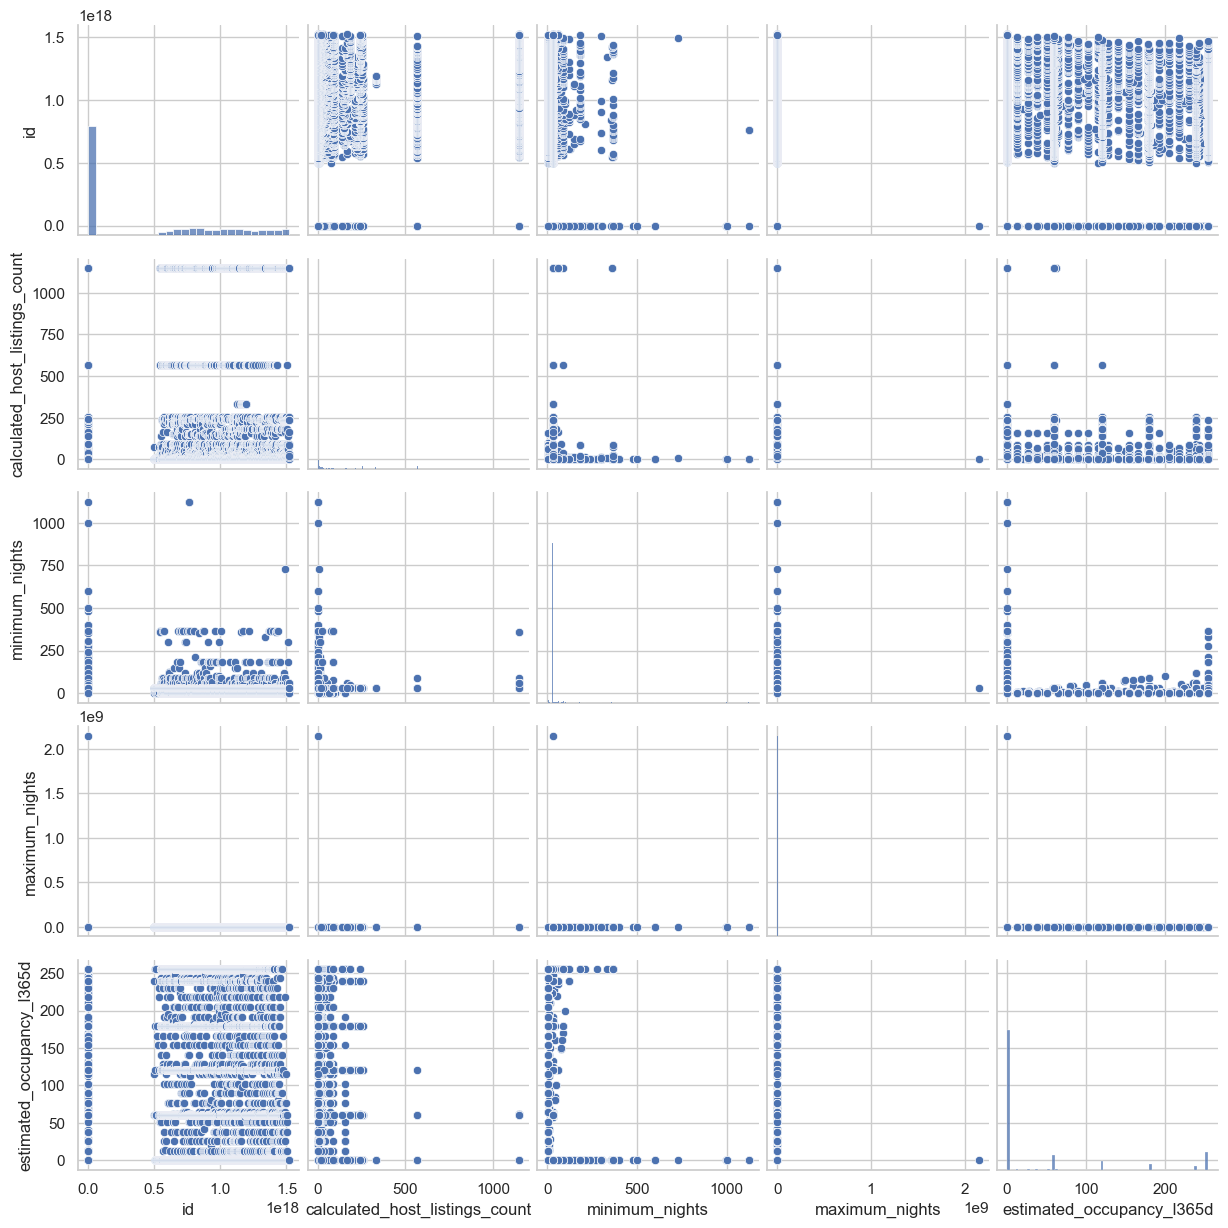

In [4]:
sns.pairplot(df[["id", "calculated_host_listings_count", "neighborhood_cleansed", "neighborhood_group_cleansed", "room_type",
                              "price", "minimum_nights", "maximum_nights", "estimated_occupancy_l365d"]])

plt.show()

Tough to tell anything from this.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      36111 non-null  int64  
 1   id                              36111 non-null  int64  
 2   listing_url                     36111 non-null  object 
 3   name                            36109 non-null  object 
 4   description                     35153 non-null  object 
 5   host_id                         36111 non-null  int64  
 6   host_name                       34945 non-null  object 
 7   neighborhood_cleansed           36111 non-null  object 
 8   neighborhood_group_cleansed     36111 non-null  object 
 9   latitude                        36111 non-null  float64
 10  longitude                       36111 non-null  float64
 11  room_type                       36111 non-null  object 
 12  price                           

In [6]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,minimum_nights,maximum_nights,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,calculated_host_listings_count
count,36111.000000,3.611100e+04,3.611100e+04,36111.000000,36111.000000,36111.000000,3.611100e+04,36111.000000,2.132800e+04,24923.000000,36111.000000
mean,18055.000000,4.667906e+17,1.756195e+08,40.728253,-73.947350,28.610091,6.003553e+04,46.951594,1.809287e+04,4.722113,67.455152
std,10424.492122,5.448721e+17,1.945624e+08,0.056269,0.054995,29.166476,1.130082e+07,85.004647,1.543908e+05,0.463000,215.678813
min,0.000000,2.595000e+03,1.678000e+03,40.500366,-74.251907,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,1.000000
25%,9027.500000,2.159416e+07,1.795864e+07,40.688260,-73.983560,30.000000,1.500000e+02,0.000000,0.000000e+00,4.650000,1.000000
50%,18055.000000,5.095308e+07,8.832602e+07,40.725960,-73.955000,30.000000,3.650000e+02,0.000000,0.000000e+00,4.860000,2.000000
75%,27082.500000,9.747695e+17,3.107737e+08,40.762120,-73.928118,30.000000,1.125000e+03,60.000000,1.887000e+04,5.000000,9.000000
max,36110.000000,1.521848e+18,7.214431e+08,40.912017,-73.711822,1124.000000,2.147484e+09,255.000000,1.276326e+07,5.000000,1148.000000


Interesting values for maximum nights. Seems like the max is really big?

For calculated host listings count, median of 2 and mean of 67 with max of 1148. Seems crazy. Definitely some businesses with many listings.

In [7]:
top_20_host_listings = df.loc[:, ["host_id", "host_name", "calculated_host_listings_count"]].sort_values("calculated_host_listings_count", ascending=False).drop_duplicates(subset=["host_id"], keep="first").head(20)

top_20_host_listings

,host_id,host_name,calculated_host_listings_count
17552,107434423,NaN,1148
31308,3223938,Eugene,567
31036,446820235,LuxurybookingsFZE,331
20572,19303369,Hiroki,256
35359,533234561,Tina,254
31946,162280872,Urban Furnished,241
27342,51501835,Jeniffer,239
19088,200239515,Shogo,226
19512,204704622,Momoyo,215
29125,35491667,Nat,184


Interesting that NaN is #1. Maybe it has one host_id any time a host_name is missing?

Some of these don't line up with what they showed on their website. 

In [8]:
len(df.loc[:, "host_id"].unique())

21382

Total number of hosts is 21,382.

In [9]:
int(df["host_name"].isna().sum())

1166

So the total number of mising values for host_name is 1166, which is just about the number we had earlier for calculated host listings count (1148).

In [10]:
missing_host_name = df[df["host_name"].isna()]

In [11]:
missing_host_name.isna().sum()

Unnamed: 0                           0
id                                   0
listing_url                          0
name                                 0
description                          1
host_id                              0
host_name                         1166
neighborhood_cleansed                0
neighborhood_group_cleansed          0
latitude                             0
longitude                            0
room_type                            0
price                              122
minimum_nights                       0
maximum_nights                       0
estimated_occupancy_l365d            0
estimated_revenue_l365d            122
review_scores_rating               994
license                           1165
calculated_host_listings_count       0
dtype: int64

I still want to keep these records since they are each an Airbnb location. The more points the more accurate our visualization will be, even if there are not
host names. Most of the other data is there anyways.

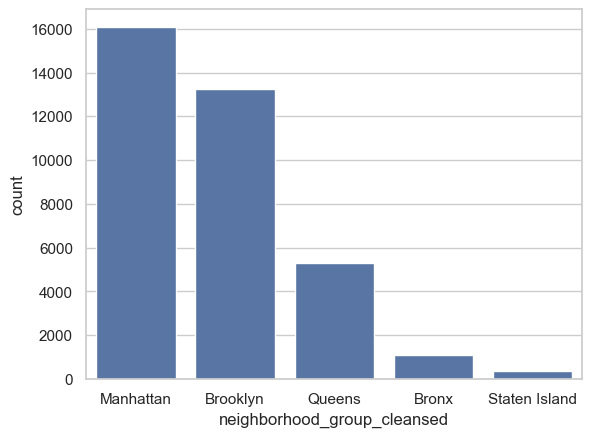

In [12]:
# order bars in descending order
order = df["neighborhood_group_cleansed"].value_counts().index

sns.countplot(data=df, 
              x="neighborhood_group_cleansed",
              order=order)

plt.show()

Most listings are in Manhattan, followed by Brooklyn. Queens has less but Bronx and Staten Island are very few.

In [13]:
len(df["neighborhood_cleansed"].unique())

224

Looks like 224 unique neighborhoods!

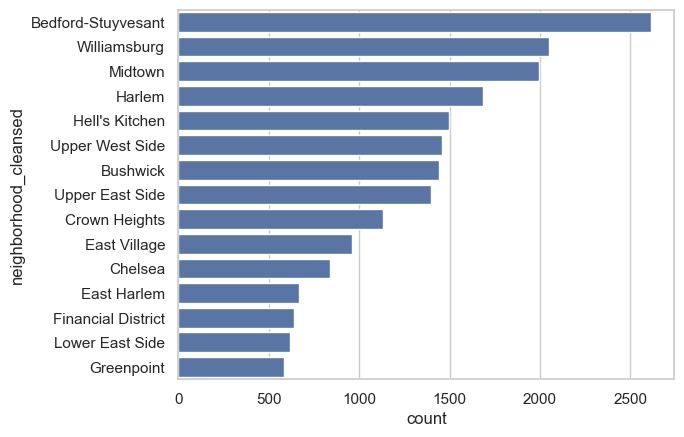

In [14]:
# order bars in descending order
# top 15 neighborhoods since there are so many
order = df["neighborhood_cleansed"].value_counts().head(15).index

sns.countplot(data=df, 
              y="neighborhood_cleansed", # horizontal bars since names are long
              order=order,
              )

plt.show()

In [15]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

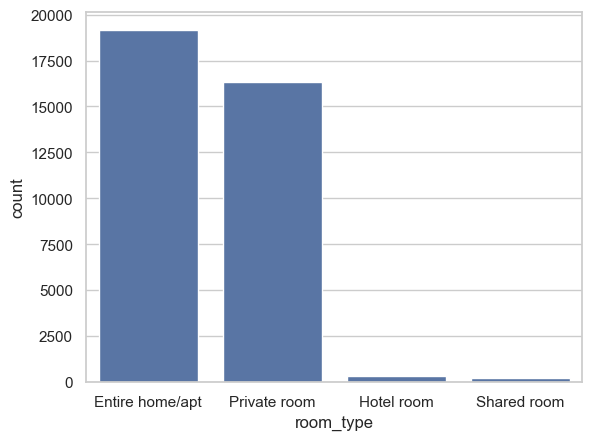

In [16]:
# order bars in descending order
order = df["room_type"].value_counts().index

sns.countplot(data=df, 
              x="room_type",
              order=order)

plt.show()

Majority are entire home/apt or private room.

In [17]:
df[df["room_type"] == "Private room"][["minimum_nights", "maximum_nights"]].describe()

,minimum_nights,maximum_nights
count,16350.000000,16350.000000
mean,26.284098,549.498960
std,28.557070,453.153454
min,1.000000,1.000000
25%,30.000000,95.000000
50%,30.000000,365.000000
75%,30.000000,1125.000000
max,1124.000000,10000.000000


Mean minimum nights is 26, and the median is 30.

Local Law 18:

Requires hosts to register with the city and allow rentals for less than 30 days only if the host is present and shares their home with a maximum of two guests. Platforms must verify registration numbers, and illegal rentals can lead to fines of up to $5,000. Rentals of entire units for less than 30 days are generally banned, except for specific cases like one-family or two-family homes where the host is not present (but the law is complicated and the city requires verification).

https://www.nyc.gov/site/specialenforcement/registration-law/registration.page

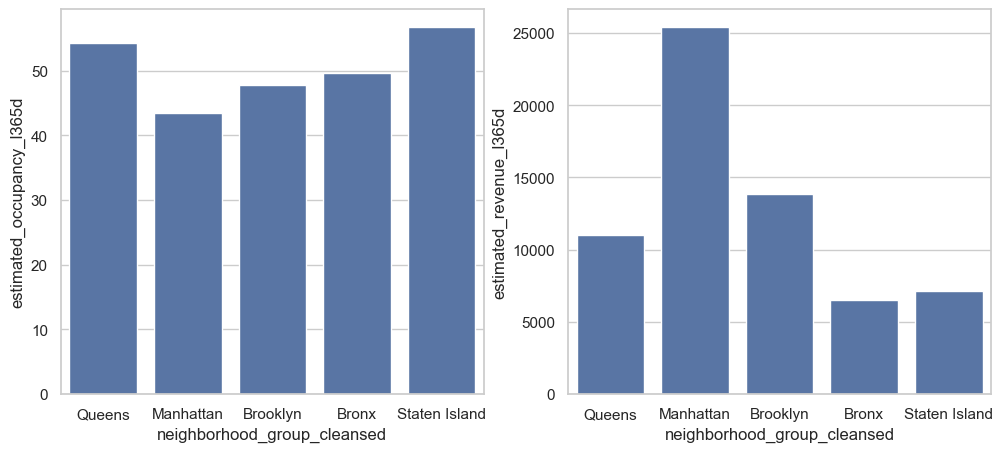

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data = df,
    x = "neighborhood_group_cleansed",
    y = "estimated_occupancy_l365d",
    ax=ax[0],
    errorbar=None    )

sns.barplot(
    data = df,
    x = "neighborhood_group_cleansed",
    y = "estimated_revenue_l365d",
    ax=ax[1],
    errorbar=None
    )

plt.show()

Occupancy is relatively similar between boroughs.

Revenue, on the other hand, is not. Manhattan sees the most revenue. This would probably need to be adjusted based on number of listings, but since we are not focusing on the price in this project, I will leave it at that. 